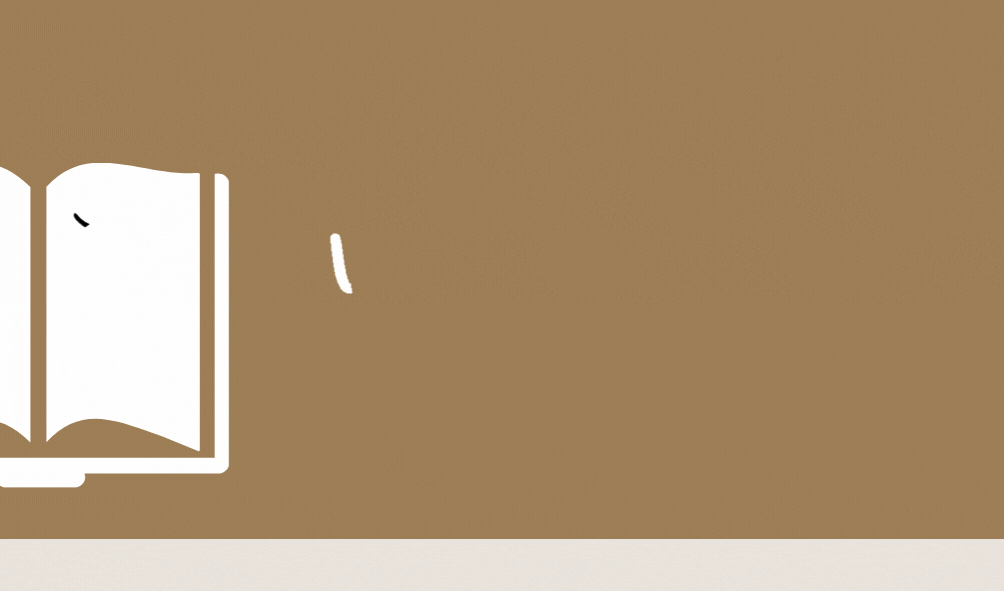

In [144]:
# Importing libraries needed in analysis

import numpy as np  # linear algebra - Arraies
import pandas as pd  # data processing, CSV file - Dataframe
import matplotlib.pyplot as plt  # plotting - Visualization 
import seaborn as sns # Visualization 

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

##### Reading csv file

In [145]:
# read our data 
books = pd.read_csv("books.csv", error_bad_lines = False,warn_bad_lines=False)

#Skipping line 3350: expected 12 fields, saw 13
#Skipping line 4704: expected 12 fields, saw 13
#Skipping line 5879: expected 12 fields, saw 13
#Skipping line 8981: expected 12 fields, saw 13
books.shape

(11123, 12)

In [146]:
# show how much we have row and column 
print('this dataset have:'
      f'\n{books.shape[0]} rows \n' # shape[0] is the row 
      f'{books.shape[1]} columns') # shape[1] is the column

this dataset have:
11123 rows 
12 columns


In [147]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


#### outcome
- the database have `12` columns and `11123` record
- There are `#6` numerical columns with `#5` int64 values and `#1` float64 and `#6` categorical (object) values .
- `num_pages` have space , let's change that 
- the data type of `publication_date `is object while it supposed to be integer
 
 
 

In [148]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [149]:
# give me top 5 rows , let's see the first 5 rows
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# EDA

In [150]:
# We delete the space in the number of pages by rename it 
books.rename(columns={'  num_pages': 'num_pages'},inplace=True)
#  or we can use [ df.columns=df.columns.str.strip() ] for all the columns that have space
# rename the column 'language_code' for simplesty
books.rename(columns={'language_code': 'language'},inplace=True)
books.columns

#  or we can use [ df.columns=df.columns.str.strip() ] for all the columns that have space

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [151]:
# rename and replace the old value to the new value 
books.language.replace(to_replace=['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por',
       'srp', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur',
       'gla', 'ale'],value=['English','US-English','French','Spanish','British-English','Multiple language',
        'Greek','Middle English','Canada-English','German','japanese','arabic','Dutch','Chinese','Latvian',
        'Portuguese','Serbian','Initial teaching language',
       'russian','Modern Standard Arabic','Galician','Welsh','Swedish','Murik','Turkish','Gaelic','Afro-Asiatic']
                       ,inplace=True)

In [152]:
# review my new values
books.language.unique()

array(['English', 'US-English', 'French', 'Spanish', 'British-English',
       'Multiple language', 'Greek', 'Middle English', 'Canada-English',
       'German', 'japanese', 'arabic', 'Dutch', 'Chinese', 'Latvian',
       'Portuguese', 'Serbian', 'Initial teaching language', 'russian',
       'Modern Standard Arabic', 'Galician', 'Welsh', 'Swedish', 'Murik',
       'Turkish', 'Gaelic', 'Afro-Asiatic'], dtype=object)

In [153]:
# check any missing value
books.isna().head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [154]:
# review missing values 
books.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language              0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [155]:
# checking if there is any duplicate record
duplicate_book = books.duplicated().sum()
print (f'the duplicated record in the dataset is : {duplicate_book}')

the duplicated record in the dataset is : 0


 ##### No missing values & no duplicated record great 
 
 .

In [156]:
# drop column that i well not use
books.drop(['isbn','isbn13'], axis=1 , inplace=True)
books.head(1)

,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,English,652,2095690,27591,9/16/2006,Scholastic Inc.


In [157]:
# make sure that ['isbn','isbn13'] has drop
books.head(1)

,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,English,652,2095690,27591,9/16/2006,Scholastic Inc.


In [158]:
# see the columns after deleting 'drop'
books.shape

(11123, 10)

# Exploration data

.

In [159]:
# Group by column 'authors count' to see the most outhors book release or published 
most_books = books.groupby('authors').agg({'title' : 'count'})
most_book = most_books.sort_values('title', ascending=False)
most_book.head(7)

,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29


In [160]:
# use duplicated in 'authors' column to see how much we have authors
print('number of authors in the data : {} '.format(books['authors'].duplicated().sum()))

number of authors in the data : 4484 


In [161]:
# or i can use 'value_counts()' to see the most outhors book release or published 
auth =books['authors'].value_counts()
auth.head(7)

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Mercedes Lackey     29
Name: authors, dtype: int64

`P.G. Wodehouse` and `Stephen King` are the most author published books 

In [162]:
#Let's check the unique values
for i in books.columns:
    print('\n',i,books[i].unique())


 bookID [    1     2     4 ... 45634 45639 45641]

 title ['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)' ...
 'The Ice-Shirt (Seven Dreams #1)' 'Poor People'
 'Las aventuras de Tom Sawyer']

 authors ['J.K. Rowling/Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'C.S. Lewis/Ana Falcão Bastos'
 'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos'
 'William T. Vollmann/Larry McCaffery/Michael Hemmingson']

 average_rating [4.57 4.49 4.42 4.56 4.78 3.74 4.73 4.38 4.22 4.21 3.44 3.87 4.07 3.9
 3.83 3.86 3.91 3.93 4.59 4.5  4.36 4.53 3.84 3.72 4.   3.88 4.33 3.45
 3.76 3.6  4.06 4.17 3.55 3.98 4.13 3.95 4.24 4.34 3.92 4.23 3.75 3.94
 3.77 4.46 3.68 3.99 3.25 3.89 3.82 3.78 4.01 4.35 4.28 3.34 3.67 3.48
 3.5  3.62 4.27 3.39 4.12 4.08 4.05 3.85 2.99 4.19 3.71 4.2  3.65 3.4
 4.11 3.42 4.02 3.69 4.1  3.66 4.61 4.04 3.97 4.14 3.57 3.43 3.22 3.64
 3.96 

In [163]:
# show the most book that people rate it by using '.max' refers to maximum & print the message 'text'
print('\nBook with maximum rating count=',books['ratings_count'].max())
# sort values for ratings_count 
# books[books['ratings_count'] == books['ratings_count'].max()]
rate =books.sort_values('ratings_count', ascending=False)
rate.head(1)


Book with maximum rating count= 4597666


,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,English,501,4597666,94265,9/6/2006,Little Brown and Company


In [164]:
# show the most book that people write reviw about it by using '.max' refers to maximum & print the message 'text'
print('\nBook with maximum text reviws count=',books['text_reviews_count'].max())
# sort values for text_reviews_count
rate =books.sort_values('text_reviews_count', ascending=False)
rate.head(1)
#books[books['text_reviews_count'] == books['text_reviews_count'].max()]
#books.head(1)


Book with maximum text reviws count= 94265


,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,English,501,4597666,94265,9/6/2006,Little Brown and Company


In [165]:
#arrange the data using text_reviews_count
books.sort_values(['text_reviews_count'],ascending =False, axis =0, inplace= True)
#assigning "text_reviews_count" in a new variable for easy visualizing
book_top10 = books['text_reviews_count']
book_top10.head(1)

10336    94265
Name: text_reviews_count, dtype: int64

###### we notes that `Twilight (Twilight #1)` has the highset `ratings_count` and `text_reviews_count` 
###### so he have the most rating book 

In [166]:
# discover the most book have most number of pages by using 'sort_values' and put ascending=False to sort from max to min
num =books.sort_values('num_pages', ascending=False)
num.head(3)

,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,English,6576,1338,81,10/17/2004,W. W. Norton Company
6802,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,English,4736,1493,99,5/9/1986,Mariner Books
10906,44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,English,3400,6,1,3/5/1981,Chatto & Windus


##### `The Complete Aubrey/Maturin Novels (5 Volumes)` is the most book contains pages 

In [167]:
# use 'idmax' to see the name of the language with highr number of books
most_lang=books['language'].value_counts().idxmax()
print(f'most books written by : \n {most_lang} ')

most books written by : 
 English 


In [168]:
# show The most written language 
#'value_counts()' Return a Series containing counts of unique values in descending order
lang=books.language.value_counts()
lang.head(7)

English            8908
US-English         1408
Spanish             218
British-English     214
French              144
German               99
japanese             46
Name: language, dtype: int64

In [169]:
# show The most written language 
vlu= books.language.value_counts().max()
print(f'the English have most language written by with : \n {vlu} books')

the English have most language written by with : 
 8908 books


##### most books are written in `english` with `8908` books

In [170]:
# show the books that have the rating = 5 , use condition '=='
max_rat=books[books['average_rating'] == 5]
print('the number of books who have average rating = 5')
print(len(max_rat))

the number of books who have average rating = 5
22


In [171]:
# see that in list
max2= books[books['average_rating'] == 5]
max2.head(22)

,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,English,74,5,3,2/1/2006,Square One Publishers
9324,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0,English,24,2,1,2/1/2003,Disney Press
6247,23552,The New Big Book of America,Todd Davis/Marc Frey,5.0,English,56,2,1,3/21/2002,Courage Books
8544,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5.0,English,336,1,1,6/17/2003,Zondervan
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,English,32,4,1,1/1/2002,Teaching Resources
9282,36492,Oliver Wendell Holmes in Paris: Medicine Theo...,William C. Dowling,5.0,English,179,1,1,2/28/2007,University Press of New England
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,English,96,1,0,6/1/2004,Boosey & Hawkes Inc
9893,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,English,240,2,0,10/16/2007,Multnomah
4125,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,English,128,2,0,3/6/2003,BradyGames
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,Greek,364,0,0,2/22/1922,Oxford University Press USA


In [172]:
# show the books that have the rating = 0
min_rat= books[books['average_rating'] == 0]
print('the number of books who have average rating = 0')
print(len(min_rat))

the number of books who have average rating = 0
25


In [173]:
# see it in list
min2= books[books['average_rating'] == 0]
min2.head(25)

,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10138,41044,Day and Night,Better Homes and Gardens,0.0,English,32,0,1,3/1/1989,Meredith Corporation
7144,27416,Mythographi Graeci 1: Apollodori Bibliotheca ...,Apollodorus/Richard Wagner,0.0,Greek,335,0,0,7/15/1998,K.G. Saur Verlag
5323,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,English,63,0,0,12/31/1997,Arts Publications
9437,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.0,English,241,0,0,8/5/2006,Routledge
7797,30080,Beckett Football Card Price Guide,Dan Hitt/James Beckett III,0.0,English,830,0,0,9/1/2006,Beckett Media
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,English,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,English,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
7634,29404,Your Child and Jesus: A Family Activity Book,Rick Osborne/Kevin Miller,0.0,English,112,0,0,9/13/1999,Moody Publishers
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,English,112,0,0,6/1/2005,BradyGames
11027,45259,Anthony Thwaite: In Conversation With Peter Da...,Peter Dale/Ian Hamilton/Anthony Thwaite,0.0,English,96,0,0,12/9/1999,Between the Lines Productions


The highest average rating is `5.0` , There are `22` books that have maximum average rating.

The lowest average rating is `0` , There are `25` books that have lowest average rating

In [174]:
# reviw the most book have the higher rating 'average_rating' 
#  select the rows where the column named 'ratings_count' is bigger than 1000000: using condition
top_7 = books[books['ratings_count'] > 1000000]
#sort the value of our condition by='average_rating'
top_7.sort_values(by='average_rating', ascending=False).head(7)

,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,English,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,English,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,English,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,English,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,English,552,1516367,86881,3/14/2006,Alfred A. Knopf
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,English,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,English,366,2530894,32871,8/15/2002,Houghton Mifflin


` Harry Potter and the Half-Blood Prince (Harry potter #6)` is the higher rated book with `4.57` rate

In [34]:
# show the author that is most rated 'favorite author' based on people vote 'rate'
most_rated_author =books[books['average_rating']>4.4]
most_rated_author = most_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(7).set_index('authors')
most_rated_author.head(7)

,title
authors,
Hiromu Arakawa/Akira Watanabe,12
J.K. Rowling,10
J.R.R. Tolkien,9
Hiromu Arakawa/荒川弘/方郁仁,8
Bill Watterson,7
J.K. Rowling/Mary GrandPré,6
Hiromu Arakawa,5



the most rated author with more than `4.4` rate is ` Hiromu Arakawa/Akira Watanabe` with  ` 12`  books

# visualization

.



<AxesSubplot:title={'center':'Most higher rating book'}, xlabel='average_rating', ylabel='title'>

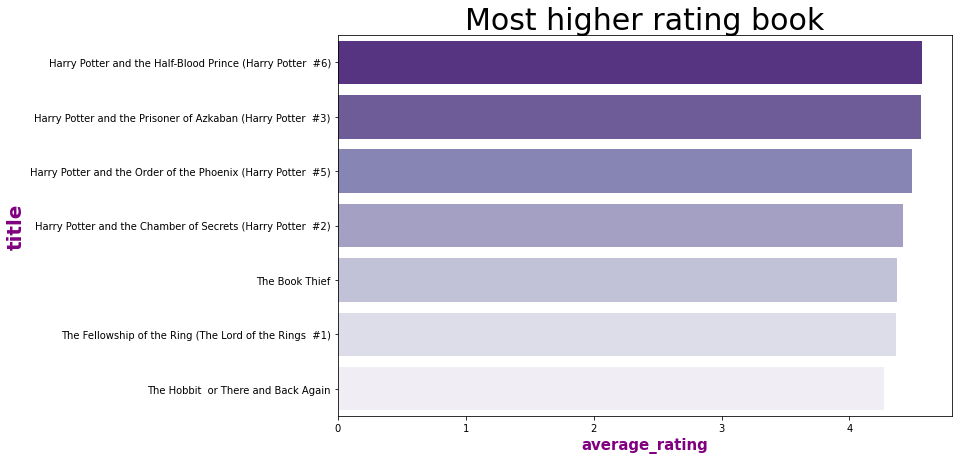

In [35]:
# visualize the book with higher rating 'average_rating'
plt.figure(figsize=(11, 7)) #top_ten
data = top_7.sort_values(by='average_rating', ascending=False).head(7)
plt.title('Most higher rating book',fontsize=30, color='black');
plt.xlabel('average_rating' ,fontsize = 15,weight = 'bold',color='purple')
plt.ylabel('title',fontsize = 20, weight = 'bold',color='purple')
sns.barplot(x='average_rating', y='title', data=data,  palette='Purples_r')

Text(0.5, 1.0, 'Top 7 highly rated authors')

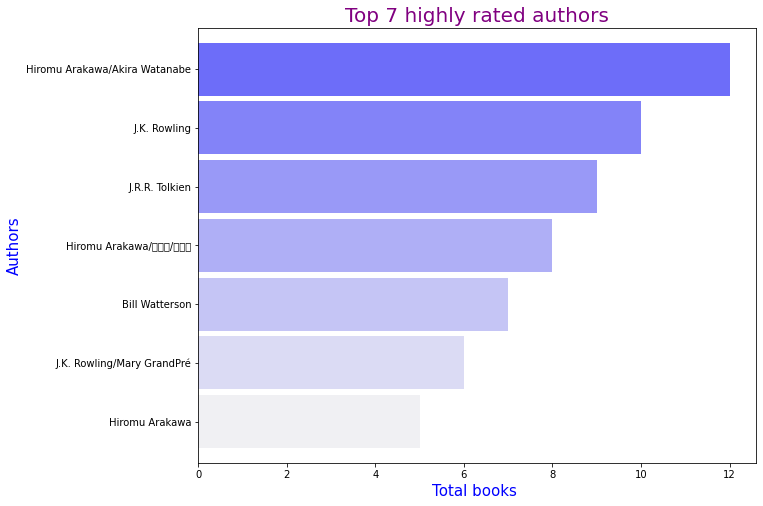

In [36]:
# visualize authors that is most rated 
plt.subplots(figsize=(10,8))
ax = most_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('light:b',12))
ax.set_xlabel("Total books ", fontsize=15 , color='blue')
ax.set_ylabel("Authors", fontsize=15 ,  color='blue')
ax.set_title("Top 7 highly rated authors",fontsize=20,color='purple')

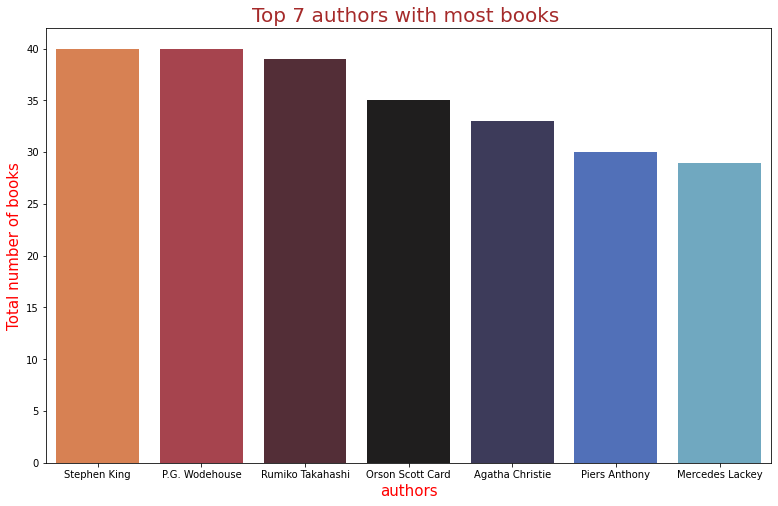

In [37]:
# visualize most authors who wrote books
most_books = books.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(7).set_index('authors');
plt.figure(figsize=(13,8));
ax = sns.barplot(most_books.index , most_books['title'], palette='icefire_r');
ax.set_title('Top 7 authors with most books ' ,fontsize=20 , color='brown');
ax.set_xlabel('authors' , fontsize=15,  color='red');
ax.set_ylabel('Total number of books' , fontsize=15,color='red');

<AxesSubplot:title={'center':'Most reading language'}, xlabel='language', ylabel='count'>

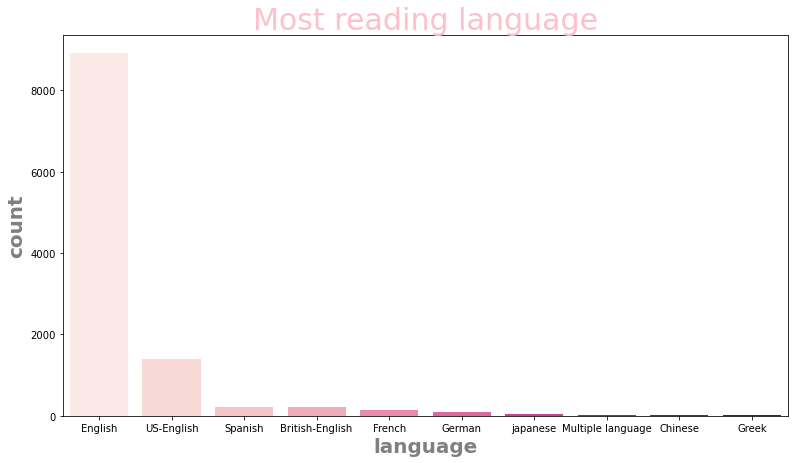

In [38]:
# visualize the language that most people read
plt.figure(figsize =[13,7])
plt.title('Most reading language',fontsize=30, color='pink');
plt.xlabel('language' ,fontsize = 20,weight = 'bold',color='gray')
plt.ylabel('Count',fontsize = 20, weight = 'bold',color='gray')
sns.countplot(x = "language", order=books['language'].value_counts().index[0:10] ,data=books,palette='RdPu')

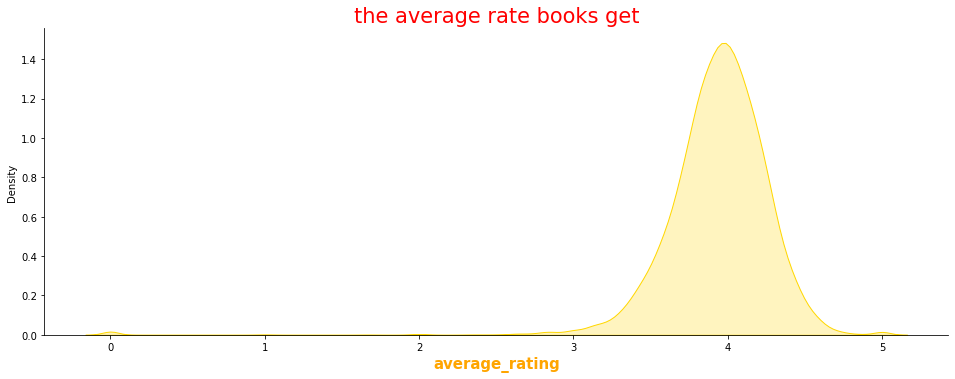

In [39]:
# visualize the average rating that most books get 
# using 'distplot' for drawing distribution plots for average_rating
g = sns.displot(books,x='average_rating',kind='kde',fill=True , color='gold');
plt.xlabel('average_rating' ,fontsize = 15,weight = 'bold',color='orange')
plt.title('the average rate books get',fontsize=21, color='red');
g.fig.set_figwidth(15)

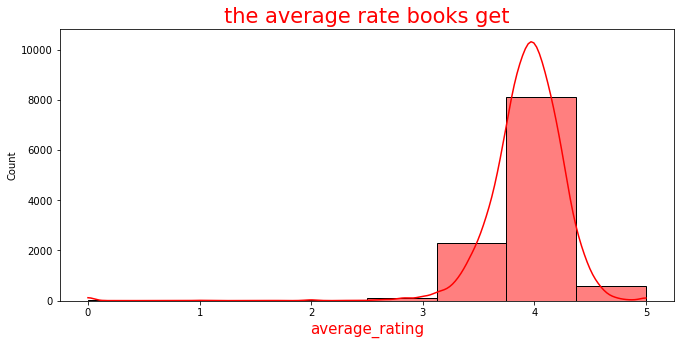

In [40]:
# or we can use histograms 'histplot' for simplesty
plt.figure(figsize =[11,5]);
sns.histplot(books['average_rating'],bins=8, kde=True , color='red' , );
plt.xlabel('average_rating' ,fontsize = 15,color='red')
plt.title('the average rate books get',fontsize=21, color='red');

##### the average rate is between `3 and 5` so most of the  books have average rate `4 `

`'ratings_count'` and `'text_reviews_count'` There is  a little` postive relationship` between them 

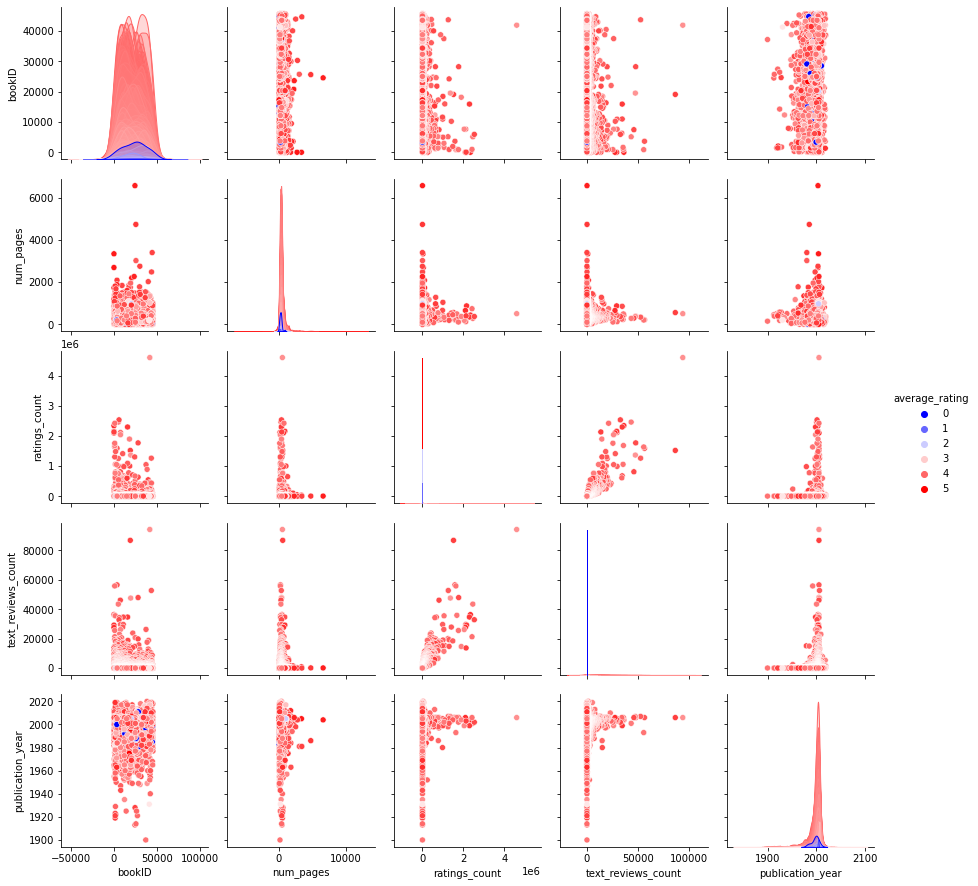

In [144]:
# do the pair before modeling to see if there is overlab between our features ans see if thay have good relationship 
sns.pairplot(books,hue='average_rating',palette='bwr', kind='scatter' )

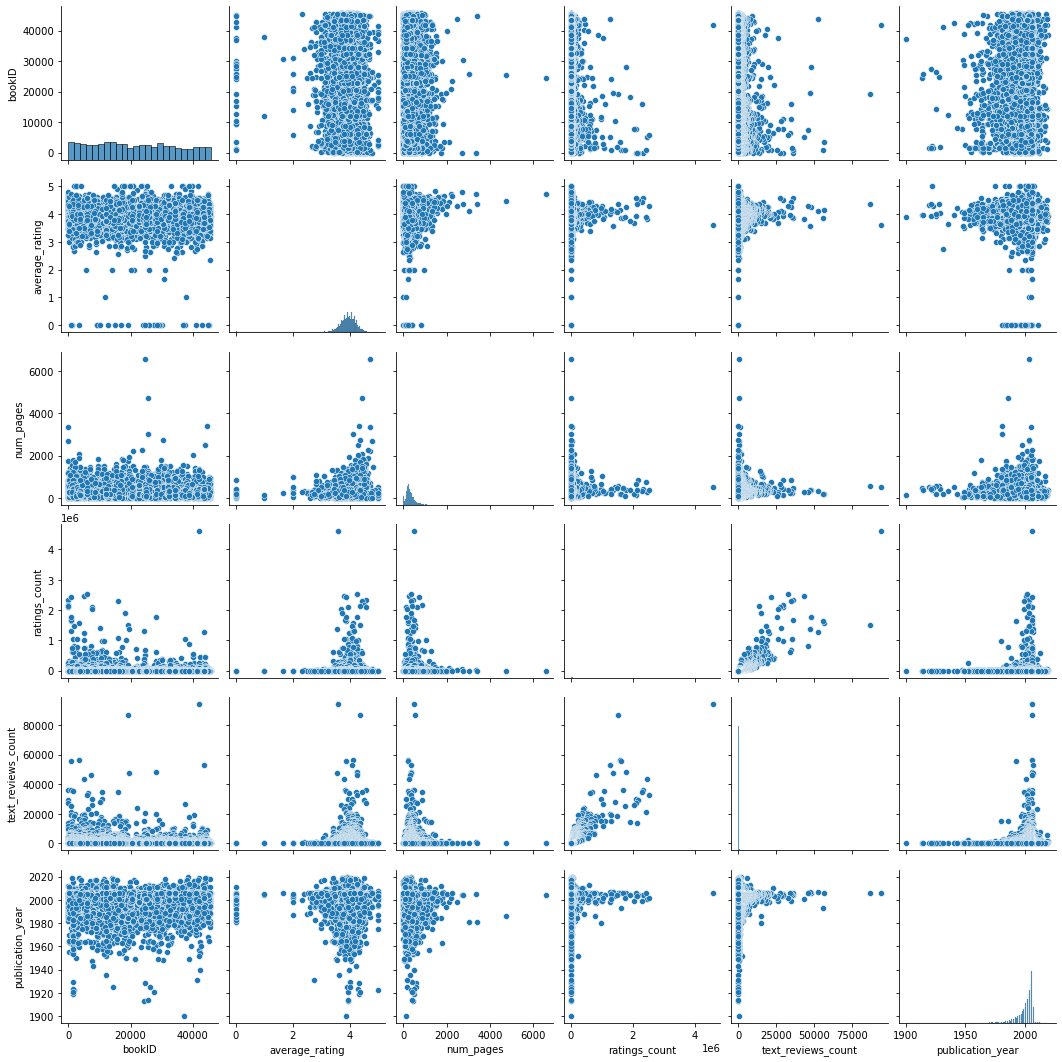

In [321]:
sns.pairplot(books)

 i dont have a very good relationship between my feature but i have a little postive relationship between `ratings_count ` and  `text_reviews_count`

<AxesSubplot:>

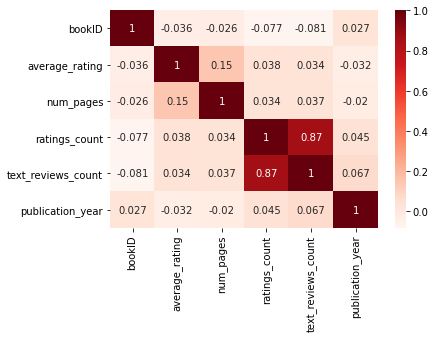

In [41]:
# use heatmap to show the correlation
sns.heatmap(books.corr(), cmap="Reds", annot=True)

In [187]:
# correlation
books.corr()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_year
bookID,1.000000,-0.036207,-0.026134,-0.076820,-0.081289,0.027482
average_rating,-0.036207,1.000000,0.150477,0.038224,0.033663,-0.031738
num_pages,-0.026134,0.150477,1.000000,0.034337,0.036977,-0.019503
ratings_count,-0.076820,0.038224,0.034337,1.000000,0.865977,0.044564
text_reviews_count,-0.081289,0.033663,0.036977,0.865977,1.000000,0.066910
publication_year,0.027482,-0.031738,-0.019503,0.044564,0.066910,1.000000


i will chose the `text_reviews_count` and `ratings_count` because thay are the only features have highr correlation that i can chose and i will use them in modeling

# modeling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
# take the useful features only that help me with predict 
# splitting the dataset into dependent & independent variables
X=books[['average_rating', 'ratings_count' , 'num_pages']]
y=books[['text_reviews_count']]
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=0)


#### Training the Model

In [50]:
# train the Linear Regression on the training set 
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [116]:
# Print out the coefficients of the model
print(lm.coef_)

[[19.12329322  0.02084927  0.06269206]]


#### Predicting Test Data

In [52]:
# evaluate its performance by predicting off the test values
predictions = lm.predict(X_test)
r2_score(y_test , predictions)

0.7308174335606862

In [53]:
# evaluate its performance by predicting off the train values
# show the score of train values
prediction = lm.predict(X_train)
r2_score(y_train , prediction)

0.7504043441237649

### Evaluation

In [54]:
# R^2 for train set
lm.score(X_train, y_train)

0.7504043441237649

In [55]:
# R^2 for test set
lm.score(X_test, y_test)

0.7308174335606862

In [56]:
# Adjusted R-Squared for training set
Adjusted_R_Squared=1-(1-lm.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1)
Adjusted_R_Squared

0.750337001110218

In [57]:
# Adjusted R-Squared for test set
Adjusted_R_Squared=1-(1-lm.score(X_test,y_test))*(len(y)-1)/(len(y)-X.shape[1]-1)
Adjusted_R_Squared

0.7307448058334338

###### as you can see i have a fitting model based on the score that i got

In [190]:
# Create a scatterplot of the real test values versus the predicted values
# predictions = lm.predict(X_test)
#plt.scatter(y_test,predictions)
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

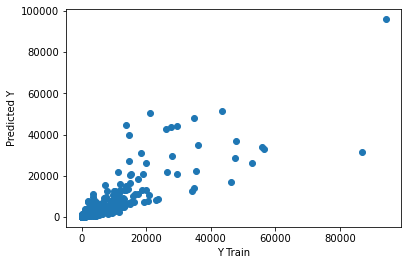

In [59]:
# Create a scatterplot of the real test values versus the predicted values
prediction = lm.predict(X_train)
plt.scatter(y_train,prediction)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')

###### try Logistic Regression in my dataset and compare between LinearRegression and LogisticRegression which one is better 
###### at prediction 

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [197]:
X=books[['average_rating', 'ratings_count' , 'num_pages']]
y=books[['text_reviews_count']]
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=0)


#X_train, X_test, y_train, y_test = train_test_split(books.drop('text_reviews_count', axis=1), books['text_reviews_count'], 
                                                   # test_size = 0.2, random_state=42)


In [198]:
#LR=LogisticRegression()
#SC=StandardScaler()
#LR.fit(X_train, y_train)

In [199]:
#X_test_SC=SC.fit_transform(X_test)
#y_Pred=LR.predict(X_test_SC)

In [200]:
# train the Logistic Regression on the training set 
lm1 = LogisticRegression() # setting C very high essentially removes regularization
lm1.fit(X_train, y_train)

LogisticRegression()

In [201]:
# r^2 score for train set
lm1.score(X_train, y_train)

0.05461901550910317

In [202]:
# r^2 score
lm1.score(X_test, y_test)

0.05348314606741573

In [203]:
predictions = lm1.predict(X_train)
r2_score(y_train , predictions)

-573.9401568307508

In [210]:
predictions = lm1.predict(X_test)
r2_score(y_test , predictions)

-993.8848595983625

In [205]:
Adjusted_R_Squared=1-(1-lm1.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1)
Adjusted_R_Squared

0.0543639437442438

In [206]:
# Adjusted_R_Squared=1-(1-lm1.score(X_test,y_test))*(len(y)-1)/(len(y)-X.shape[1]-1)
# Adjusted_R_Squared

In [211]:
from sklearn.metrics import classification_report
print('/n')
print(classification_report(y_test , predictions))

/n
              precision    recall  f1-score   support

           0       0.10      0.98      0.19       122
           1       0.00      0.00      0.00        84
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        45
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        43
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        18
          17       0.00 

##### as we can see from the result i got , `LinearRegression` has better score , and the model fits with LinearRegression more

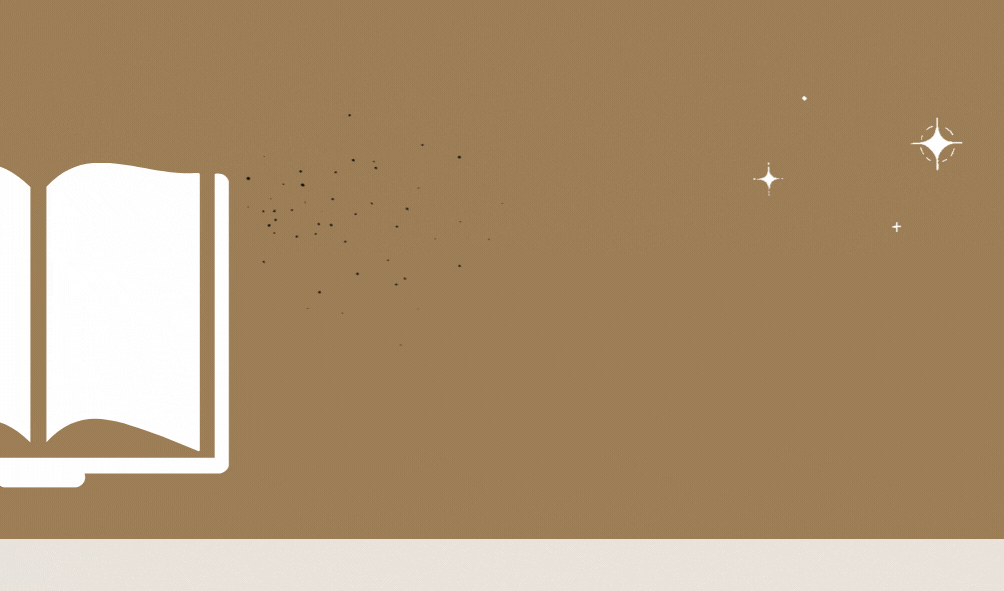